## Classification Project Exploration Notebook

Report needs:
- 4 questions of the data
- 4 visualizations (1 for each question)
- Statistical test for each question
- Takeaway notes for each question

- context for the target variable (visualization)
- 3 best models for predicting churn



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from acquire import get_telco_data
from prepare import prep_telco


In [2]:
df = get_telco_data()
df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,0,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,0,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,1,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,1,Month-to-month,Fiber optic,Mailed check


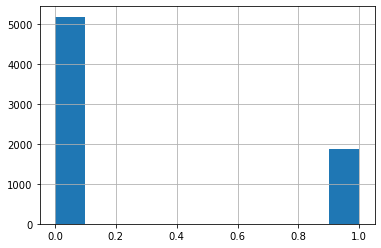

In [11]:
df.churn.hist()
plt.show()

In [12]:
df.churn.mean()

0.2653698707936959

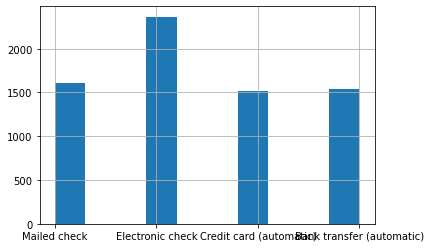

In [13]:
df.payment_type.hist()
plt.show()

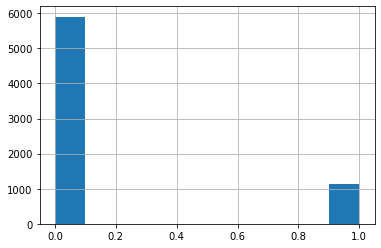

In [14]:
df.senior_citizen.hist()
plt.show()

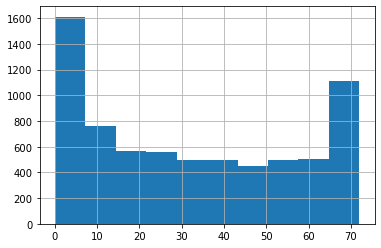

In [15]:
df.tenure.hist()
plt.show()

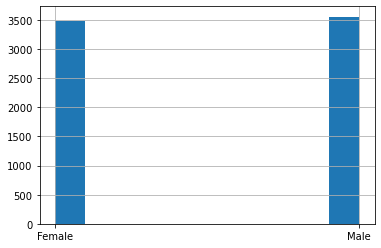

In [16]:
df.gender.hist()
plt.show()

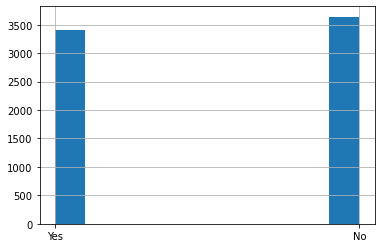

In [17]:
df.partner.hist()
plt.show()

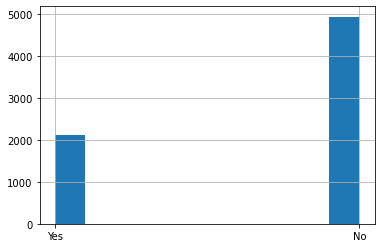

In [18]:
df.dependents.hist()
plt.show()

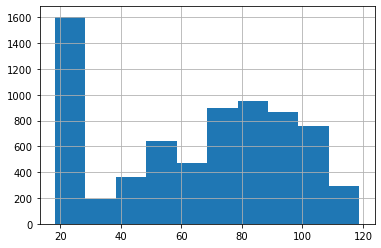

In [19]:
df.monthly_charges.hist()
plt.show()

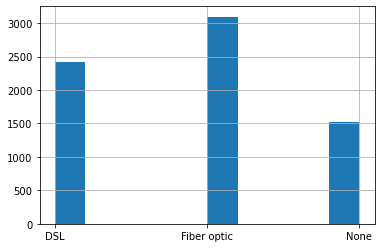

In [20]:
df.internet_service_type.hist()
plt.show()

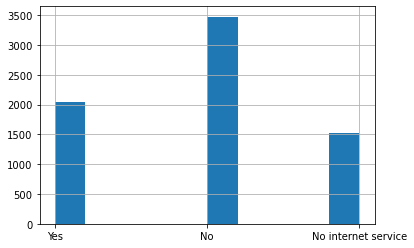

In [24]:
df.tech_support.hist()
plt.show()

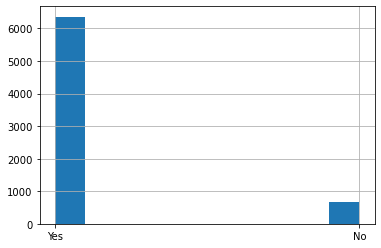

In [26]:
df.phone_service.hist()
plt.show()

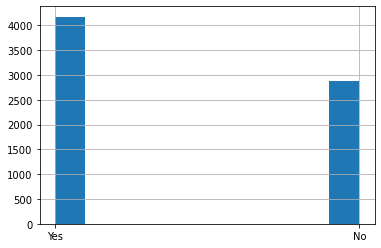

In [27]:
df.paperless_billing.hist()
plt.show()

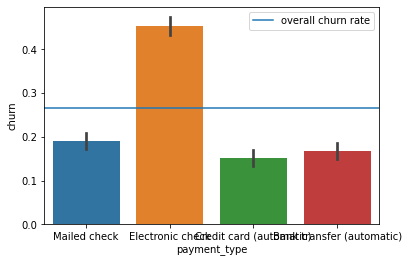

In [8]:
sns.barplot(x='payment_type', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

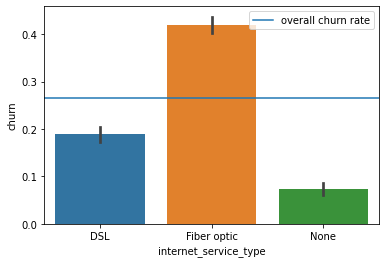

In [9]:
sns.barplot(x='internet_service_type', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

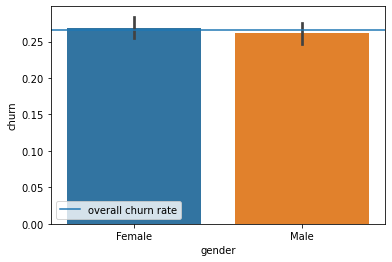

In [10]:
sns.barplot(x='gender', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

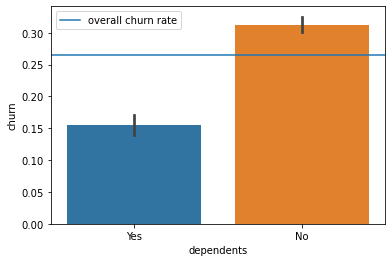

In [21]:
sns.barplot(x='dependents', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

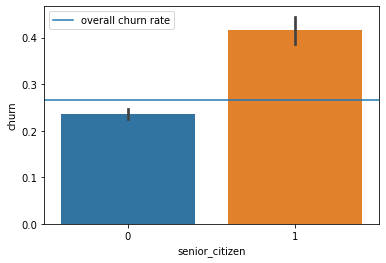

In [22]:
sns.barplot(x='senior_citizen', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

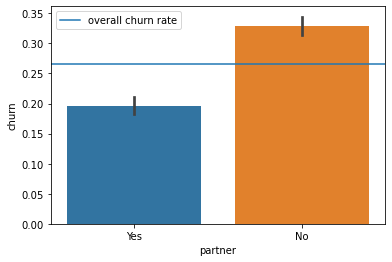

In [23]:
sns.barplot(x='partner', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

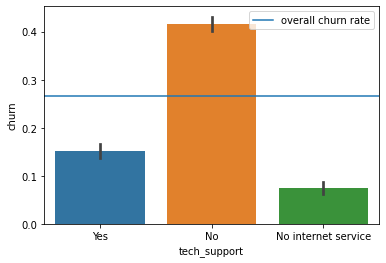

In [25]:
sns.barplot(x='tech_support', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

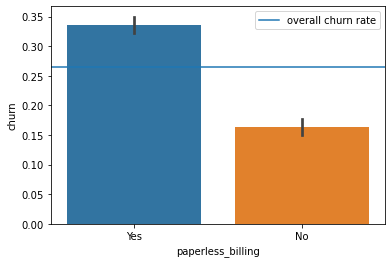

In [28]:
sns.barplot(x='paperless_billing', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

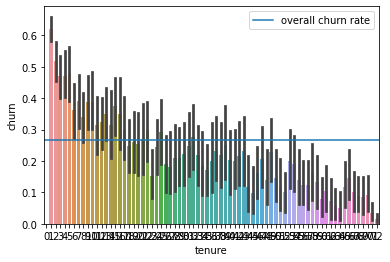

In [29]:
sns.barplot(x='tenure', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

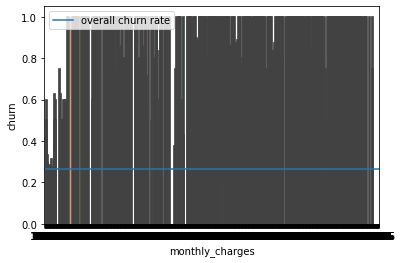

In [30]:
sns.barplot(x='monthly_charges', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

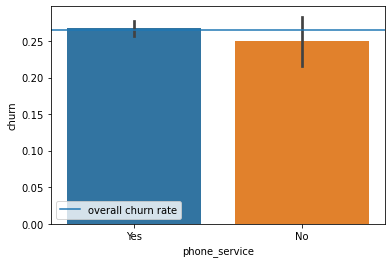

In [31]:
sns.barplot(x='phone_service', y='churn', data=df)
churn_mean = df.churn.mean()
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

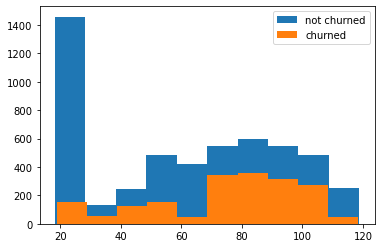

In [35]:
churned = df[df.churn == 1]
not_churn = df[df.churn == 0]
plt.hist(not_churn.monthly_charges, label = 'not churned')
plt.hist(churned.monthly_charges, label = 'churned')
plt.legend()
plt.show()

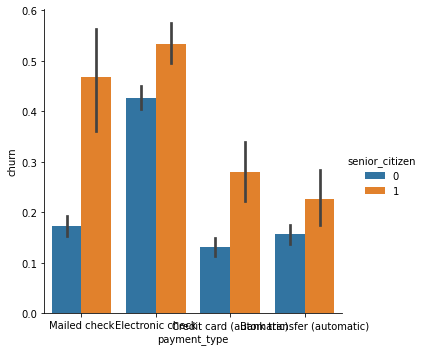

In [36]:
sns.catplot(data=df, x="payment_type", y="churn", hue="senior_citizen", kind="bar")
plt.show()

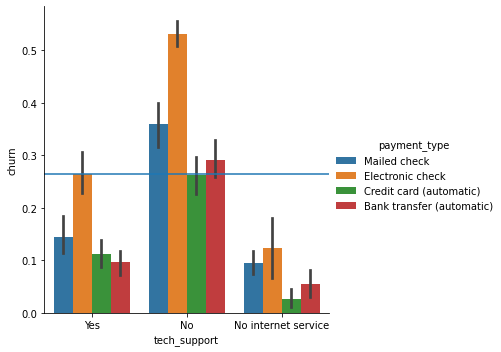

In [39]:
sns.catplot(data=df, x="tech_support", y="churn", hue="payment_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

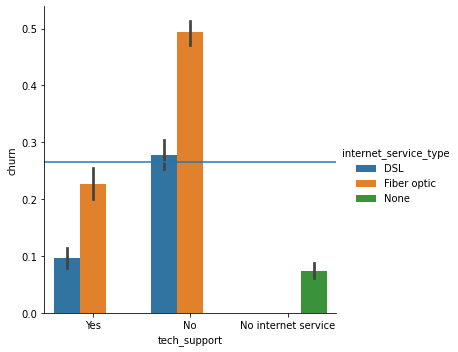

In [40]:
sns.catplot(data=df, x="tech_support", y="churn", hue="internet_service_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

---

---

In [ ]:
#refine the prepare telco data function

def prep_telco2(df):
    df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)
    df = df.drop(columns = ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id'])
    df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
    encode_cols = [col for col in df.columns if df[col].dtype == 'O']
    for col in encode_cols:
        dummie_df = pd.get_dummies(df[col], prefix = df[col].name, drop_first = True)
    
    df = pd.concat([df, dummie_df], axis=1)
    df = df.rename(columns={'payment_type_Credit card (automatic)':'pay_credit', 'payment_type_Electronic check': 'pay_elec', 'payment_type_Mailed check': 'pay_mail'})
    
    
    train, validate, test = split_telco_data(df)
    
    return train, validate, test

In [4]:
df = prep_telco(df)

In [5]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,1,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,1,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,1,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,0,1,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,0,1,0,0,1,0,0,0,1


In [6]:
#create the split telco data variable

def split_telco_data(df):
    train_val, test = train_test_split(df, train_size = 0.8, stratify = df.churn, random_state=123)
    train, validate = train_test_split(train_val, train_size = 0.7, stratify = train_val.churn, random_state=123)
    return train, validate, test

In [7]:
train, validate, test = split_telco_data(df)

In [8]:
train.shape, validate.shape, test.shape

((3943, 46), (1691, 46), (1409, 46))

---

---

## Start here with updated prepare function in prepare.py

In [2]:
df = get_telco_data()
df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
train, validate, test = prep_telco(df)

In [4]:
train.shape, validate.shape, test.shape

((3943, 7089), (1691, 7089), (1409, 7089))

In [5]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_elec,pay_mail
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,...,0,1,1,0,1,0,0,0,0,0
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,No,Yes,...,0,0,0,0,1,0,0,1,0,0
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,Yes,No,No,...,0,1,0,1,0,1,0,0,1,0
2635,3748-FVMZZ,Male,0,No,No,4,No,No phone service,No,No,...,0,1,1,0,0,0,0,0,1,0
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,No,No,Yes,...,0,0,1,0,0,0,0,0,0,1


In [6]:
train.device_protection.value_counts()

No                     1692
Yes                    1402
No internet service     849
Name: device_protection, dtype: int64

In [7]:
train.shape

(3943, 7089)

In [8]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [9]:
train.pay_elec.value_counts()

0    2615
1    1328
Name: pay_elec, dtype: int64

In [10]:
train.internet_service_type_None.value_counts()

0    3094
1     849
Name: internet_service_type_None, dtype: int64

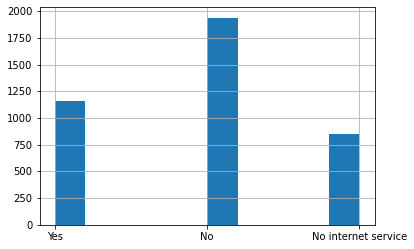

In [11]:
train.tech_support.hist()
plt.show()

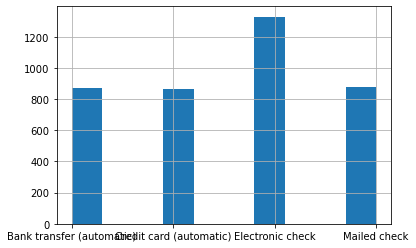

In [12]:
train.payment_type.hist()
plt.show()

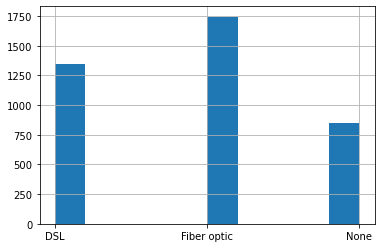

In [13]:
train.internet_service_type.hist()
plt.show()

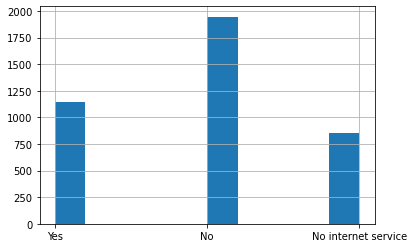

In [14]:
train.online_security.hist()
plt.show()

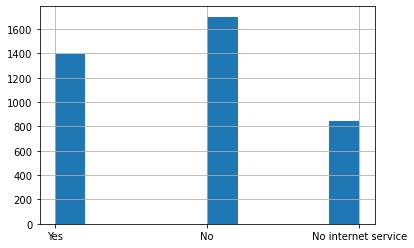

In [15]:
train.online_backup.hist()
plt.show()

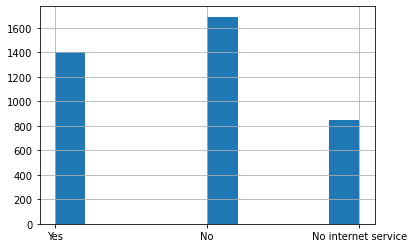

In [16]:
train.device_protection.hist()
plt.show()

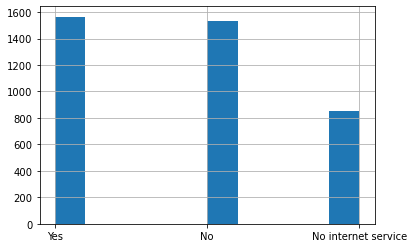

In [17]:
train.streaming_movies.hist()
plt.show()

In [18]:
churn_mean = train.churn.mean()

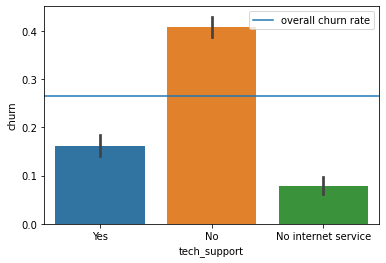

In [19]:
sns.barplot(x='tech_support', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

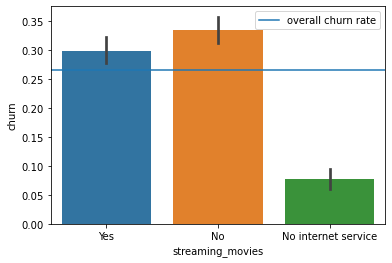

In [20]:
sns.barplot(x='streaming_movies', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

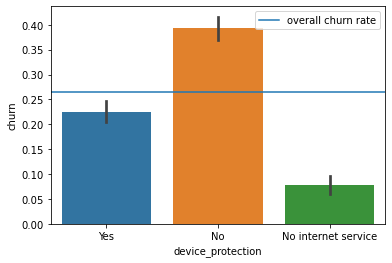

In [21]:
sns.barplot(x='device_protection', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

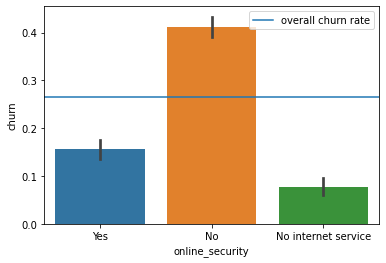

In [22]:
sns.barplot(x='online_security', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

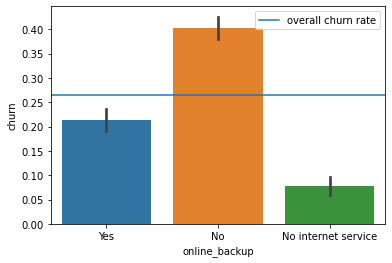

In [23]:
sns.barplot(x='online_backup', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

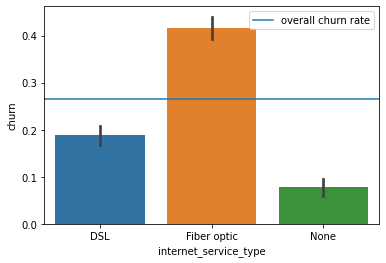

In [24]:
sns.barplot(x='internet_service_type', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

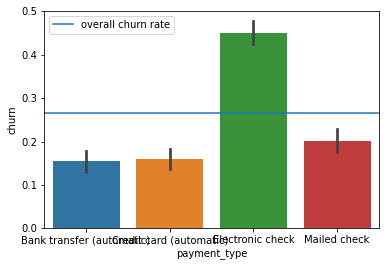

In [25]:
sns.barplot(x='payment_type', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

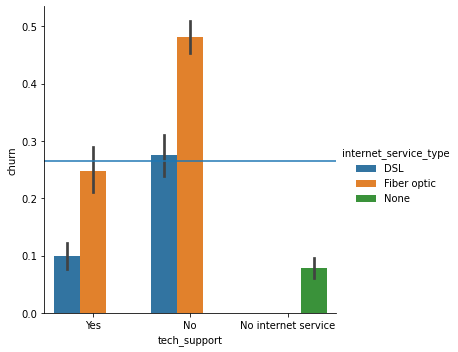

In [26]:
sns.catplot(data=train, x="tech_support", y="churn", hue="internet_service_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

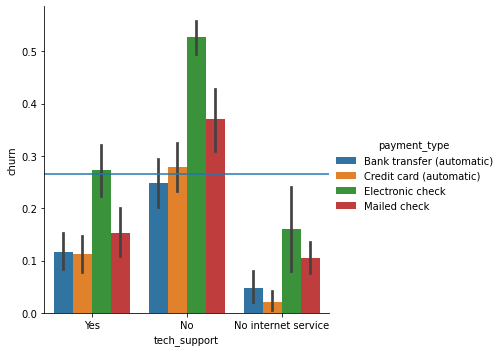

In [27]:
sns.catplot(data=train, x="tech_support", y="churn", hue="payment_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

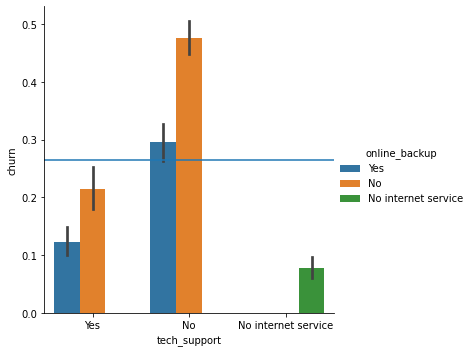

In [28]:
sns.catplot(data=train, x="tech_support", y="churn", hue="online_backup", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

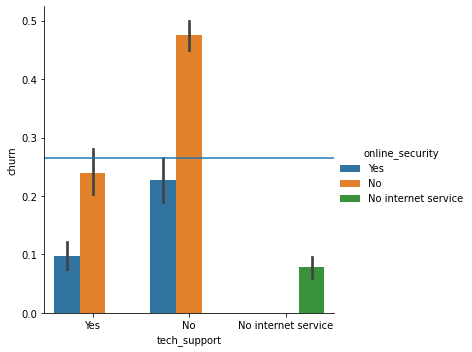

In [29]:
sns.catplot(data=train, x="tech_support", y="churn", hue="online_security", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

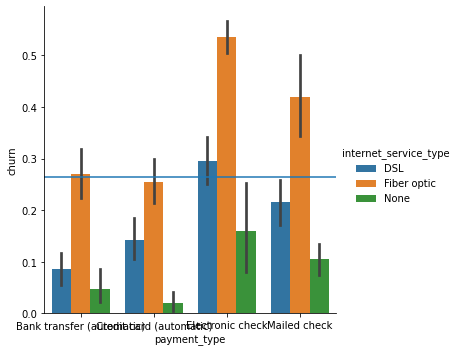

In [30]:
sns.catplot(data=train, x="payment_type", y="churn", hue="internet_service_type", kind="bar")
plt.axhline(churn_mean, label='overall churn rate')
plt.show()

In [31]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup',
       ...
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'pay_credit', 'pay_elec', 'pay_mail'],
      dtype='object', length=7089)

In [32]:
x_cols = ['tech_support_No internet service', 
          'tech_support_Yes', 'internet_service_type_Fiber optic', 
          'internet_service_type_None', 'pay_credit', 'pay_mail']

In [33]:
x_train = train[x_cols]
y_train = train[['churn']]
x_train.head()

,tech_support_No internet service,tech_support_Yes,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_mail
5310,0,1,0,0,0,0
3790,0,1,0,0,1,0
4398,0,1,1,0,0,0
2635,0,1,0,0,0,0
2986,0,0,0,0,0,1


In [34]:
y_train.head()

,churn
5310,0
3790,0
4398,0
2635,0
2986,0


In [35]:
y_train['baseline'] = 0
y_train.head()

,churn,baseline
5310,0,0
3790,0,0
4398,0,0
2635,0,0
2986,0,0


In [36]:
#evaluate the baseline value
baseline_eval = accuracy_score(y_train.churn, y_train.baseline)
baseline_eval

0.7347197565305605

In [37]:
#create the decision tree classifier object
tree = DecisionTreeClassifier(max_depth=3)

In [38]:
tree.fit(x_train, y_train.churn)

DecisionTreeClassifier(max_depth=3)

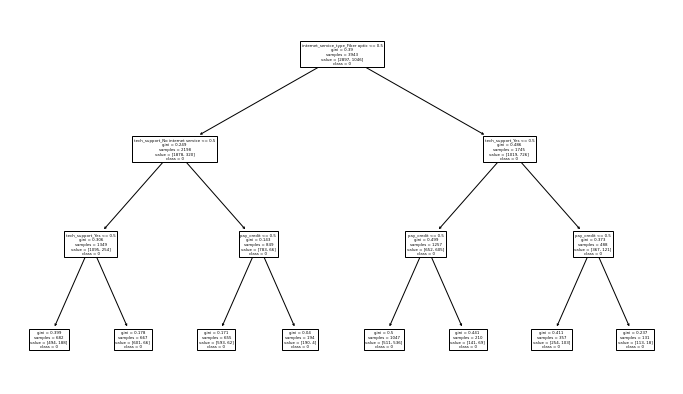

In [39]:
#visualize the decision tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=x_train.columns, class_names=y_train.churn.astype(str))
plt.show()


In [40]:
tree.score(x_train, y_train.churn)

0.7410601065178798

In [41]:
y_pred = tree.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
labels = sorted(y_train.churn.unique())

pd.DataFrame(confusion_matrix(y_train.churn, y_pred), index=labels, columns=labels)

,0,1
0,2386,511
1,510,536


In [43]:
print(classification_report(y_train.churn, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2897
           1       0.51      0.51      0.51      1046

    accuracy                           0.74      3943
   macro avg       0.67      0.67      0.67      3943
weighted avg       0.74      0.74      0.74      3943



### Model 1 - decision tree max depth = 3 
- acc = .74
- churn true prec = .51
- churn true rec = .51

#### Random Forest

In [44]:
clf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)


In [45]:
clf.fit(x_train, y_train.churn)

RandomForestClassifier(max_depth=10, random_state=123)

In [46]:
y_pred = clf.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [47]:
accuracy_score(y_train.churn, y_pred)

0.7415673345168653

In [48]:
pd.DataFrame(classification_report(y_train.churn, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.813000,0.841905,0.827200,2897.000000
1,0.514316,0.463671,0.487682,1046.000000
accuracy,0.741567,0.741567,0.741567,0.741567
macro avg,0.663658,0.652788,0.657441,3943.000000
weighted avg,0.733765,0.741567,0.737133,3943.000000


#### model 2 - random forest 
- acc = .74
- churn true prec = .51
- churn true rec = .46

### KNN

In [40]:
clf = KNN(n_neighbors=5)

In [41]:
clf.fit(x_train, y_train.churn)


KNeighborsClassifier()

In [42]:
y_pred = clf.predict(x_train)

In [43]:
accuracy_score(y_train.churn, y_pred)

0.6961704286076591

In [44]:
pd.DataFrame(classification_report(y_train.churn, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.737357,0.910942,0.815009,2897.00000
1,0.291209,0.101338,0.150355,1046.00000
accuracy,0.696170,0.696170,0.696170,0.69617
macro avg,0.514283,0.506140,0.482682,3943.00000
weighted avg,0.619003,0.696170,0.638690,3943.00000


### Model 3 - KNN
- acc = .70
- churn true prec = .10
- churn true rec = .15

### Log regression

In [45]:
logit1 = LogisticRegression(C=1, random_state=123)

In [46]:
logit1.fit(x_train, y_train.churn)

LogisticRegression(C=1, random_state=123)

In [47]:
y_pred = logit1.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [48]:
accuracy_score(y_train.churn, y_pred)

0.7410601065178798

In [49]:
pd.DataFrame(classification_report(y_train.churn, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.823895,0.823611,0.823753,2897.00000
1,0.511939,0.512428,0.512183,1046.00000
accuracy,0.741060,0.741060,0.741060,0.74106
macro avg,0.667917,0.668019,0.667968,3943.00000
weighted avg,0.741139,0.741060,0.741100,3943.00000


#### Model 3 - lg regress
-acc = .74
-churn true prec = .51
-churn true rec = .51

---

In [49]:
x_cols = ['tech_support_No internet service', 
          'tech_support_Yes', 'online_security_No internet service', 
          'online_backup_No internet service', 'online_security_Yes', 'online_backup_Yes', 
          'device_protection_No internet service', 'device_protection_Yes', 'internet_service_type_Fiber optic', 
          'internet_service_type_None', 'pay_credit', 'pay_mail', 'pay_elec']

In [50]:
x_train = train[x_cols]
y_train = train[['churn']]
x_train.head()

,tech_support_No internet service,tech_support_Yes,online_security_No internet service,online_backup_No internet service,online_security_Yes,online_backup_Yes,device_protection_No internet service,device_protection_Yes,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_mail,pay_elec
5310,0,1,0,0,1,1,0,1,0,0,0,0,0
3790,0,1,0,0,0,1,0,1,0,0,1,0,0
4398,0,1,0,0,0,0,0,0,1,0,0,0,1
2635,0,1,0,0,0,0,0,0,0,0,0,0,1
2986,0,0,0,0,0,1,0,1,0,0,0,1,0


In [51]:
y_train.head()

,churn
5310,0
3790,0
4398,0
2635,0
2986,0


In [52]:
tree = DecisionTreeClassifier(max_depth=8, random_state=123)

In [53]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=123)

In [54]:
tree.score(x_train, y_train)

0.7758052244483895

In [55]:
y_pred = tree.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.90      0.86      2897
           1       0.61      0.43      0.50      1046

    accuracy                           0.78      3943
   macro avg       0.71      0.67      0.68      3943
weighted avg       0.76      0.78      0.76      3943



### knn

In [57]:
clf = KNN(n_neighbors=5)

In [58]:
clf.fit(x_train, y_train)


KNeighborsClassifier()

In [59]:
y_pred = clf.predict(x_train)

In [60]:
accuracy_score(y_train, y_pred)

0.7646462084707076

In [61]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.827839,0.858129,0.842712,2897.000000
1,0.562766,0.505736,0.532729,1046.000000
accuracy,0.764646,0.764646,0.764646,0.764646
macro avg,0.695302,0.681933,0.687720,3943.000000
weighted avg,0.757520,0.764646,0.760480,3943.000000


In [62]:
logit = LogisticRegression(C=1, random_state=123)
logit.fit(x_train, y_train)

LogisticRegression(C=1, random_state=123)

In [63]:
y_pred = logit.predict(x_train)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
accuracy_score(y_train, y_pred)

0.7722546284554908

In [65]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.803338,0.913704,0.854974,2897.000000
1,0.614198,0.380497,0.469894,1046.000000
accuracy,0.772255,0.772255,0.772255,0.772255
macro avg,0.708768,0.647100,0.662434,3943.000000
weighted avg,0.753163,0.772255,0.752820,3943.000000


### Validate models

In [66]:
x_cols = ['tech_support_No internet service', 
          'tech_support_Yes', 'online_security_No internet service', 
          'online_backup_No internet service', 'online_security_Yes', 'online_backup_Yes', 
          'device_protection_No internet service', 'device_protection_Yes', 'internet_service_type_Fiber optic', 
          'internet_service_type_None', 'pay_credit', 'pay_mail', 'pay_elec']

In [67]:
x_val_train = validate[x_cols]
y_val_train = validate[['churn']]
x_val_train.head()

,tech_support_No internet service,tech_support_Yes,online_security_No internet service,online_backup_No internet service,online_security_Yes,online_backup_Yes,device_protection_No internet service,device_protection_Yes,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_mail,pay_elec
720,0,0,0,0,0,0,0,0,1,0,0,1,0
5832,0,0,0,0,0,1,0,1,0,0,0,0,0
4378,0,0,0,0,0,0,0,0,1,0,1,0,0
5553,1,0,1,1,0,0,1,0,0,1,0,0,0
482,0,0,0,0,0,1,0,0,1,0,0,0,1


In [68]:
x_val_train.shape

(1691, 13)

#### Decision Tree

In [69]:
#tree = DecisionTreeClassifier(max_depth=8, random_state=123)

In [70]:
y_val_pred = tree.predict(x_val_train)
y_val_pred

array([1, 0, 1, ..., 0, 0, 1])

In [71]:
print(classification_report(y_val_train, y_val_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1242
           1       0.59      0.47      0.52       449

    accuracy                           0.77      1691
   macro avg       0.71      0.68      0.69      1691
weighted avg       0.76      0.77      0.76      1691



#### KNN

In [72]:
#clf = KNN(n_neighbors=5)

In [73]:
y_val_pred = clf.predict(x_val_train)

In [74]:
pd.DataFrame(classification_report(y_val_train, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.838529,0.844605,0.841556,1242.00000
1,0.561364,0.550111,0.555681,449.00000
accuracy,0.766410,0.766410,0.766410,0.76641
macro avg,0.699946,0.697358,0.698618,1691.00000
weighted avg,0.764935,0.766410,0.765650,1691.00000


#### Logistic Regression

In [75]:
#logit = LogisticRegression(C=1, random_state=123)

In [76]:
y_val_pred = logit.predict(x_val_train)

In [77]:
pd.DataFrame(classification_report(y_val_train, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.802847,0.908213,0.852286,1242.000000
1,0.601399,0.383073,0.468027,449.000000
accuracy,0.768776,0.768776,0.768776,0.768776
macro avg,0.702123,0.645643,0.660156,1691.000000
weighted avg,0.749358,0.768776,0.750256,1691.000000


## Stats

H0 - customer churn is independent from participation in our extra programs
Ha - customer churn is not independent from participation in our extra programs

In [79]:
tech_cross = pd.crosstab(train.churn, train.tech_support)
tech_cross

tech_support,No,No internet service,Yes
churn,,,
0,1146,783,968
1,793,66,187


In [82]:
chi2, p, degf, expected = stats.chi2_contingency(tech_cross)

In [83]:
print('Observed\n')
print(tech_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1146  783  968]
 [ 793   66  187]]
---
Expected

[[1424  623  848]
 [ 514  225  306]]
---

chi^2 = 421.9453
p     = 0.0000


In [84]:
alpha = 0.05
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

We reject the null hypothesis


In [85]:
pay_cross = pd.crosstab(train.churn, train.payment_type)
pay_cross

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
0,738,727,731,701
1,135,138,597,176


In [86]:
chi2, p, degf, expected = stats.chi2_contingency(pay_cross)

In [87]:
print('Observed\n')
print(pay_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[738 727 731 701]
 [135 138 597 176]]
---
Expected

[[641 635 975 644]
 [231 229 352 232]]
---

chi^2 = 354.5801
p     = 0.0000


In [88]:
alpha = 0.05
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

We reject the null hypothesis


In [89]:
internet_cross = pd.crosstab(train.churn, train.internet_service_type)
internet_cross

internet_service_type,DSL,Fiber optic,None
churn,,,
0,1095,1019,783
1,254,726,66


In [90]:
chi2, p, degf, expected = stats.chi2_contingency(internet_cross)

In [91]:
print('Observed\n')
print(internet_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1095 1019  783]
 [ 254  726   66]]
---
Expected

[[ 991 1282  623]
 [ 357  462  225]]
---

chi^2 = 397.7389
p     = 0.0000


In [92]:
alpha = 0.05
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

We reject the null hypothesis


In [93]:
secur_cross = pd.crosstab(train.churn, train.online_security)
secur_cross

online_security,No,No internet service,Yes
churn,,,
0,1145,783,969
1,801,66,179


In [94]:
chi2, p, degf, expected = stats.chi2_contingency(secur_cross)

In [138]:
chi2, p, degf, expected = stats.chi2_contingency(secur_cross)
print('Observed\n')
print(internet_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('----\n')
alpha = 0.01
if p < alpha:
    print('there is a statistically significant relationship')

Observed

[[1095 1019  783]
 [ 254  726   66]]
---
Expected

[[1429  623  843]
 [ 516  225  304]]
---

chi^2 = 437.4420
p     = 0.0000
----

there is a statistically significant relationship


In [97]:
alpha = 0.01
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

We reject the null hypothesis


In [101]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_elec,pay_mail
5310,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,Yes,...,0,1,1,0,1,0,0,0,0,0
3790,Male,1,Yes,No,72,Yes,Yes,No,Yes,Yes,...,0,0,0,0,1,0,0,1,0,0
4398,Female,1,Yes,No,46,Yes,Yes,No,No,No,...,0,1,0,1,0,1,0,0,1,0
2635,Male,0,No,No,4,No,No phone service,No,No,No,...,0,1,1,0,0,0,0,0,1,0
2986,Male,0,Yes,No,8,Yes,No,No,Yes,Yes,...,0,0,1,0,0,0,0,0,0,1


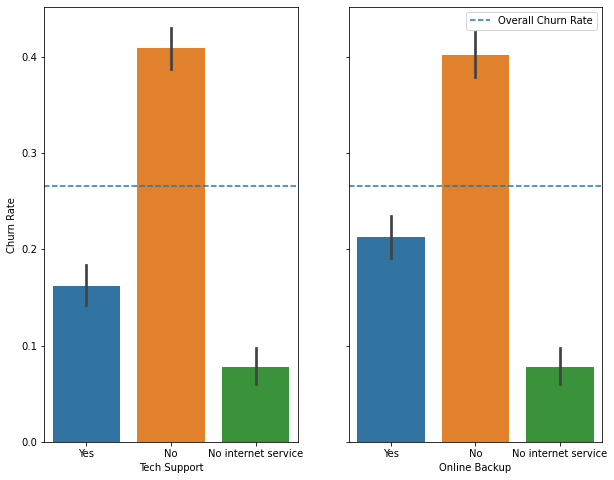

In [135]:
churn_mean = train.churn.mean()
fig, ax = plt.subplots(ncols=2, sharey=True, figsize = (10,8))
sns.barplot(x='tech_support', y='churn', data=train, ax=ax[0])
sns.barplot(x='online_backup', y='churn', data=train, ax=ax[1])
ax[0].axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
ax[0].set_xlabel('Tech Support')
ax[0].set_ylabel('Churn Rate')
plt.axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
plt.xlabel('Online Backup')
plt.ylabel('')
plt.legend()
plt.show()

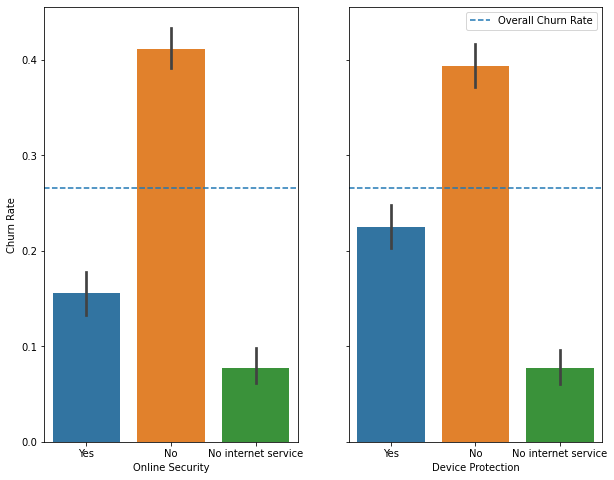

In [137]:
churn_mean = train.churn.mean()
fig, ax = plt.subplots(ncols=2, sharey=True, figsize = (10,8))
sns.barplot(x='online_security', y='churn', data=train, ax=ax[0])
sns.barplot(x='device_protection', y='churn', data=train, ax=ax[1])
ax[0].axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
ax[0].set_xlabel('Online Security')
ax[0].set_ylabel('Churn Rate')
plt.axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
plt.xlabel('Device Protection')
plt.ylabel('')
plt.legend()
plt.show()

In [113]:
x_test = test[x_cols]
y_test = test[['churn']]

In [114]:
y_test_pred = clf.predict(x_test)
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.829524,0.841546,0.835492,1035.000000
1,0.543175,0.521390,0.532060,374.000000
accuracy,0.756565,0.756565,0.756565,0.756565
macro avg,0.686350,0.681468,0.683776,1409.000000
weighted avg,0.753517,0.756565,0.754950,1409.000000


In [127]:
churn_predict = clf.predict_proba(x_test)
predictions = pd.DataFrame(churn_predict, columns= ('no_churn_prediction', 'churn_probability'))

In [128]:
predictions = predictions.drop(columns='no_churn_prediction')
predictions.head()

,churn_probability
0,0.0
1,0.0
2,0.4
3,0.6
4,0.6


In [129]:
customer_id = test.customer_id.reset_index()
customer_id.head()

,index,customer_id
0,3160,4531-AUZNK
1,1577,2296-DKZFP
2,6823,9692-TUSXH
3,3615,5129-JLPIS
4,882,1273-MTETI


In [130]:
customer_id = customer_id.drop(columns='index')
customer_id.head()

,customer_id
0,4531-AUZNK
1,2296-DKZFP
2,9692-TUSXH
3,5129-JLPIS
4,1273-MTETI


In [131]:
cust_pred = pd.concat([customer_id, predictions], axis=1)
cust_pred.head()

,customer_id,churn_probability
0,4531-AUZNK,0.0
1,2296-DKZFP,0.0
2,9692-TUSXH,0.4
3,5129-JLPIS,0.6
4,1273-MTETI,0.6


In [132]:
cust_pred.shape


(1409, 2)

In [133]:
y_test_pred


array([0, 0, 0, ..., 0, 0, 1])

In [134]:
cust_pred['churn_prediction'] = y_test_pred

In [135]:
cust_pred.head()

,customer_id,churn_probability,churn_prediction
0,4531-AUZNK,0.0,0
1,2296-DKZFP,0.0,0
2,9692-TUSXH,0.4,0
3,5129-JLPIS,0.6,1
4,1273-MTETI,0.6,1


In [136]:
cust_pred.to_csv('predictions.csv')